In [4]:
# load data
import pandas as pd

pred_y = pd.read_csv('pred_y.csv')
val_10 = pd.read_csv('val_10.csv')

In [7]:
print(pred_y)

               0
0       0.016000
1       0.000424
2       0.001129
3       0.001544
4       0.000419
5       0.000558
6       0.002459
7       0.000555
8       0.021375
9       0.000656
10      0.013492
11      0.000370
12      0.002070
13      0.002911
14      0.003784
15      0.001320
16      0.003910
17      0.000756
18      0.000680
19      0.021733
20      0.021096
21      0.002649
22      0.000435
23      0.775995
24      0.000717
25      0.001492
26      0.782353
27      0.000615
28      0.001106
29      0.000438
...          ...
130570  0.048029
130571  0.000398
130572  0.000573
130573  0.000475
130574  0.000457
130575  0.678134
130576  0.000772
130577  0.009436
130578  0.000579
130579  0.019349
130580  0.922525
130581  0.000620
130582  0.000693
130583  0.000485
130584  0.043795
130585  0.001599
130586  0.000942
130587  0.160316
130588  0.120741
130589  0.005384
130590  0.000648
130591  0.000372
130592  0.000685
130593  0.002949
130594  0.067917
130595  0.000495
130596  0.0019

In [8]:
print(val_10)

                         qid  \
0       32731ffbe434103d4d2f   
1       22615bc52ec969e338e3   
2       a4125b8f9172d123665a   
3       4706fd6854ba9f8f9e4a   
4       285c408d9e7b0acdd682   
5       ed0fb5e7992ad32d24a7   
6       9d027701dfab755234fc   
7       9f75039996233147b44b   
8       be6cef61c36539b57dff   
9       0e1541dfb69ccc8ad48e   
10      6582fc5ae137cbcf794f   
11      eaf3e16bc44d2b600dc0   
12      e95d705866f535cdb99f   
13      2d394a14c488fa79d000   
14      15a82b56730a644e3394   
15      b764dffbaaf497fc5a75   
16      1e3fac9f57b0dd04bb0d   
17      7f452e90755a1833d195   
18      1c658649b87b8c4801c0   
19      cb42ce66cc40e68a6ac8   
20      f5bd7c9be0f4cb408d46   
21      2b9132ca251e165288d8   
22      29dfb02464bdad6084b3   
23      53eabdf71a994c732b7d   
24      a679c539d6f5b38f9c3e   
25      7d224750260b20ebb33d   
26      e71cdfb62b0e75caeb56   
27      7ba9efca5f2233cd63a6   
28      57f269ca98601e05fb7d   
29      5c4f29390728fee6e5ce   
...     

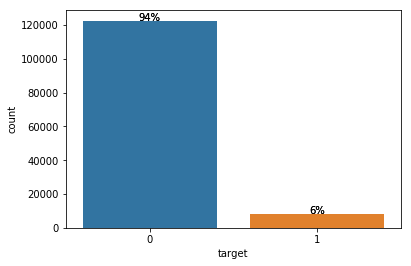

In [10]:
# ratio of val_10
# ratio of toxic text?
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x='target', data=val_10)
total = val_10.shape[0]
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0:.0%}'.format(height/total),
            ha="center") 
plt.show()

In [11]:
non_toxic_val_10 = val_10[val_10['target'] == 0]
non_toxic_val_10.shape

(122510, 3)

In [12]:
toxic_val_10 = val_10[val_10['target'] == 1]
toxic_val_10.shape

(8090, 3)

In [20]:
# FP, FN
# threshold = 0.25, which means that >0.25 then toxic

result = pd.concat([val_10, pred_y], axis = 1)
print(result.head())

                    qid                                      question_text  \
0  32731ffbe434103d4d2f  How intelligent was Homo erectus compared to o...   
1  22615bc52ec969e338e3  What is the next step in mid after the entranc...   
2  a4125b8f9172d123665a       How can I treat a contusion on the left knee   
3  4706fd6854ba9f8f9e4a  What are some thoughts about Walt Whitman s Mi...   
4  285c408d9e7b0acdd682                  What are conformal field theories   

   target         0  
0       0  0.016000  
1       0  0.000424  
2       0  0.001129  
3       0  0.001544  
4       0  0.000419  


In [28]:
# rename
result.rename(columns={'0':'prob'}, inplace=True)
print(result)

                         qid  \
0       32731ffbe434103d4d2f   
1       22615bc52ec969e338e3   
2       a4125b8f9172d123665a   
3       4706fd6854ba9f8f9e4a   
4       285c408d9e7b0acdd682   
5       ed0fb5e7992ad32d24a7   
6       9d027701dfab755234fc   
7       9f75039996233147b44b   
8       be6cef61c36539b57dff   
9       0e1541dfb69ccc8ad48e   
10      6582fc5ae137cbcf794f   
11      eaf3e16bc44d2b600dc0   
12      e95d705866f535cdb99f   
13      2d394a14c488fa79d000   
14      15a82b56730a644e3394   
15      b764dffbaaf497fc5a75   
16      1e3fac9f57b0dd04bb0d   
17      7f452e90755a1833d195   
18      1c658649b87b8c4801c0   
19      cb42ce66cc40e68a6ac8   
20      f5bd7c9be0f4cb408d46   
21      2b9132ca251e165288d8   
22      29dfb02464bdad6084b3   
23      53eabdf71a994c732b7d   
24      a679c539d6f5b38f9c3e   
25      7d224750260b20ebb33d   
26      e71cdfb62b0e75caeb56   
27      7ba9efca5f2233cd63a6   
28      57f269ca98601e05fb7d   
29      5c4f29390728fee6e5ce   
...     

In [43]:
FP = result[(result['target'] == 0) & (result['prob']>0.25)]
FN = result[(result['target'] == 1) & (result['prob']<=0.25)]

In [45]:
FN.shape

(2185, 4)

In [46]:
# rate of FP
len(FP)/result.shape[0]

0.025995405819295558

In [47]:
# rate of FN
len(FN)/result.shape[0]

0.016730474732006125

In [54]:
# what do FP, FN data look like
pd.options.display.max_colwidth = 100
print(FP['question_text'][0:20])

122                                        Why is the Squat of Israel called a state by the so called Jews
130                  Should continually lying to Congress or the American people be an impeachable offense
154    Obama gave speeches about unity while Trump mocks the liberals so how is that his supporters do ...
167                      Is it possible for blacks to become white in Europe after staying for a long time
274                    Why don t neoliberals realize that the Democratic Party can only win by moving left
287                     Why hasn t anyone exposed Donald Trumps illegal actions while building Trump Tower
384                                   Why Modi   yogi style leader s are ignorant about Indian Orphan kids
399    Since we have thousands of Mexican Citizens here illegally should we send them to be relief work...
409                                                        Are Indians thankful to Arnab Goswami If so Why
422                                  

In [55]:
print(FN['question_text'][0:20])

102                                                                         Why does Jinping look like bear
174                                 For girls do you love to rub your feet together while wearing pantyhose
271                                                              Can I fart in a bottle and sale it on eBay
420     If Xi Jinping is disastrous for China like Mao then should other countries help Xi to remain in ...
551                  If Trump is for  America First  why isn t he restricting H1 B visas for tech companies
606                   What do Canadians think about their Prime Minister being ridiculed all over the world
632                                                                           Why are autistic kids so loud
751     How can I convince my ex girlfriends to stop calling me and offering to perform sexual favors si...
779                                                      How do you get a PS4 controller to play on your PC
800                         

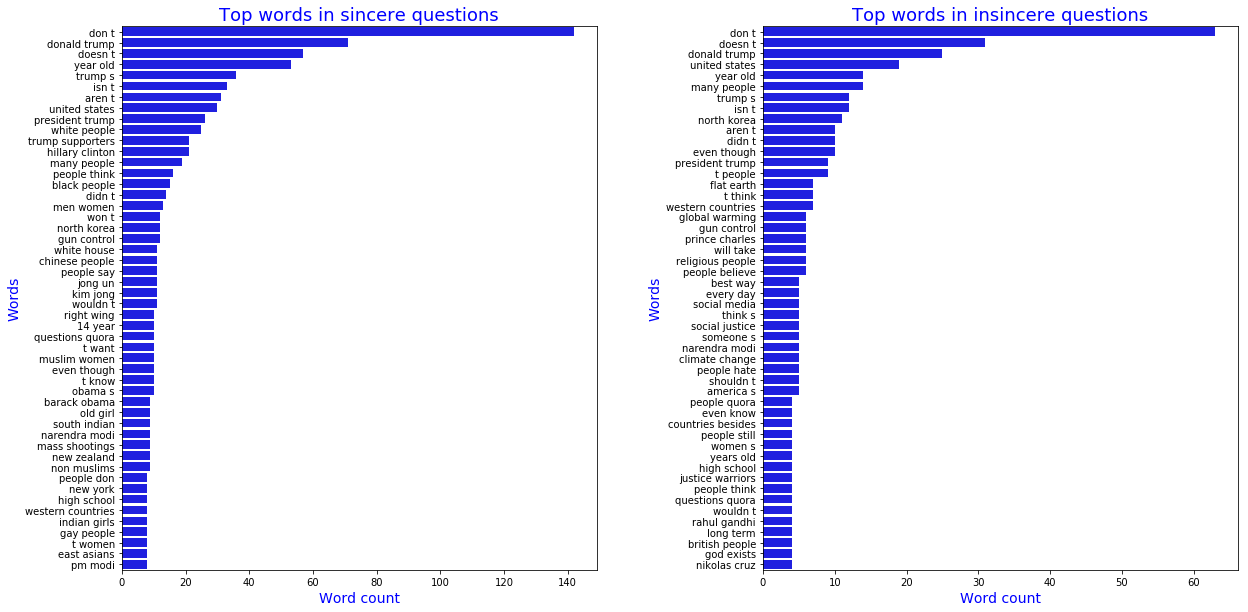

In [59]:
# word counts of those data
# reference: 
# https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-qiqc
# https://www.kaggle.com/arunsankar/key-insights-from-quora-insincere-questions

from collections import defaultdict
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
stopwords = stopwords.union(more_stopwords)

def ngram_extractor(text, n_gram):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Function to generate a dataframe with n_gram and top max_row frequencies
def generate_ngrams(df, col, n_gram, max_row):
    temp_dict = defaultdict(int)
    for question in df[col]:
        for word in ngram_extractor(question, n_gram):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(max_row)
    temp_df.columns = ["word", "wordcount"]
    return temp_df

def comparison_plot(df_1,df_2,col_1,col_2, space):
    fig, ax = plt.subplots(1, 2, figsize=(20,10))
    
    sns.barplot(x=col_2, y=col_1, data=df_1, ax=ax[0], color="blue")
    sns.barplot(x=col_2, y=col_1, data=df_2, ax=ax[1], color="blue")

    ax[0].set_xlabel('Word count', size=14, color="blue")
    ax[0].set_ylabel('Words', size=14, color="blue")
    ax[0].set_title('Top words in sincere questions', size=18, color="blue")

    ax[1].set_xlabel('Word count', size=14, color="blue")
    ax[1].set_ylabel('Words', size=14, color="blue")
    ax[1].set_title('Top words in insincere questions', size=18, color="blue")

    fig.subplots_adjust(wspace=space)
    
    plt.show()
    
insincere_2gram_fp = generate_ngrams(FP, 'question_text', 2, 50)
insincere_2gram_fn = generate_ngrams(FN, 'question_text', 2, 50)

comparison_plot(sincere_2gram_fp,insincere_2gram_fn,'word','wordcount', .35)

In [60]:
# add hwh's result
lr_prob = pd.read_csv('pred_y_lr.csv')
print(lr_prob)

               0
0       0.031110
1       0.001637
2       0.021093
3       0.003511
4       0.000112
5       0.005005
6       0.043655
7       0.002601
8       0.005742
9       0.028317
10      0.136103
11      0.000458
12      0.000821
13      0.001896
14      0.006686
15      0.073943
16      0.005103
17      0.022776
18      0.001692
19      0.098458
20      0.046292
21      0.019882
22      0.000306
23      0.873971
24      0.001303
25      0.007863
26      0.147362
27      0.002221
28      0.034029
29      0.000624
...          ...
130570  0.048469
130571  0.002600
130572  0.009103
130573  0.000129
130574  0.003002
130575  0.828670
130576  0.009580
130577  0.148101
130578  0.001414
130579  0.094187
130580  0.977163
130581  0.000476
130582  0.017629
130583  0.001205
130584  0.004655
130585  0.003296
130586  0.011346
130587  0.313885
130588  0.284400
130589  0.054968
130590  0.001698
130591  0.005922
130592  0.001480
130593  0.007713
130594  0.153247
130595  0.001510
130596  0.0065

In [63]:
# improvement of DL compared to LR
# FP of LR improved by DL, FN of LR improved by DL
result.full = pd.concat([result, lr_prob], axis = 1)
print(result.full)

                         qid  \
0       32731ffbe434103d4d2f   
1       22615bc52ec969e338e3   
2       a4125b8f9172d123665a   
3       4706fd6854ba9f8f9e4a   
4       285c408d9e7b0acdd682   
5       ed0fb5e7992ad32d24a7   
6       9d027701dfab755234fc   
7       9f75039996233147b44b   
8       be6cef61c36539b57dff   
9       0e1541dfb69ccc8ad48e   
10      6582fc5ae137cbcf794f   
11      eaf3e16bc44d2b600dc0   
12      e95d705866f535cdb99f   
13      2d394a14c488fa79d000   
14      15a82b56730a644e3394   
15      b764dffbaaf497fc5a75   
16      1e3fac9f57b0dd04bb0d   
17      7f452e90755a1833d195   
18      1c658649b87b8c4801c0   
19      cb42ce66cc40e68a6ac8   
20      f5bd7c9be0f4cb408d46   
21      2b9132ca251e165288d8   
22      29dfb02464bdad6084b3   
23      53eabdf71a994c732b7d   
24      a679c539d6f5b38f9c3e   
25      7d224750260b20ebb33d   
26      e71cdfb62b0e75caeb56   
27      7ba9efca5f2233cd63a6   
28      57f269ca98601e05fb7d   
29      5c4f29390728fee6e5ce   
...     

In [64]:
result.full.rename(columns={'0':'lr_prob'}, inplace=True)
print(result.full)

                         qid  \
0       32731ffbe434103d4d2f   
1       22615bc52ec969e338e3   
2       a4125b8f9172d123665a   
3       4706fd6854ba9f8f9e4a   
4       285c408d9e7b0acdd682   
5       ed0fb5e7992ad32d24a7   
6       9d027701dfab755234fc   
7       9f75039996233147b44b   
8       be6cef61c36539b57dff   
9       0e1541dfb69ccc8ad48e   
10      6582fc5ae137cbcf794f   
11      eaf3e16bc44d2b600dc0   
12      e95d705866f535cdb99f   
13      2d394a14c488fa79d000   
14      15a82b56730a644e3394   
15      b764dffbaaf497fc5a75   
16      1e3fac9f57b0dd04bb0d   
17      7f452e90755a1833d195   
18      1c658649b87b8c4801c0   
19      cb42ce66cc40e68a6ac8   
20      f5bd7c9be0f4cb408d46   
21      2b9132ca251e165288d8   
22      29dfb02464bdad6084b3   
23      53eabdf71a994c732b7d   
24      a679c539d6f5b38f9c3e   
25      7d224750260b20ebb33d   
26      e71cdfb62b0e75caeb56   
27      7ba9efca5f2233cd63a6   
28      57f269ca98601e05fb7d   
29      5c4f29390728fee6e5ce   
...     

In [65]:
FP_LR = result.full[(result.full['target'] == 0) & (result.full['lr_prob']>0.25)]
FN_LR = result.full[(result.full['target'] == 1) & (result.full['lr_prob']<=0.25)]

In [66]:
print(FP_LR)

                         qid  \
87      94fe3cec422bc5b058f4   
88      30d77b8e5ec73be939fd   
122     72ec7438678ea056e0c4   
129     2785b01e718512ce890c   
130     aa5ec369b4d71963a6fd   
154     5f00a130d5b708ed738c   
269     8a63b877e3a8b6208477   
274     ac37d5371c47468a753f   
287     e2f699b2075ffc622ad1   
291     f4de7c865a908a30ac68   
384     e5b4f32cc36d640ff734   
387     6f89325cd903cb5bd6bf   
399     f690799207646d580454   
409     37eac6a7537fd0d3d0bf   
422     2e2a19b93e6cbbd09eb8   
493     998d3632f26f6fa8ce49   
589     dede9e0db1128779b94f   
643     de4a34f2071ba97b4cbc   
682     266e471ae098cd6d74a1   
718     5f6b611670ba459cd059   
766     efa88d18329880fe7254   
809     4d7499626ab155f064e7   
851     3b2352a023688b2c4e0b   
1014    1ced9a3da4f46e17056e   
1047    43b2f1b1a7d28fe7a605   
1092    456970e6e0c525eadaf8   
1175    a4bbf3bb99a142fb7750   
1207    d24641d791c56862544e   
1212    afb0e1db328f65451aac   
1217    af285e2762795035cc99   
...     

In [67]:
FP_LR_improved = FP_LR[FP_LR['prob']<=0.25]
FN_LR_improved = FN_LR[FN_LR['prob']>0.25]

In [68]:
# FP improvement text samples
print(FP_LR_improved['question_text'][0:20])

87                                                    Will you mind if I request you to show a pic of yours
88             Do Trump supporters understand the unsavory consequences of their vote and continued support
129                       If people cannot control their children why bother having more to annoy the world
269                                                                       Why are atheists deifying science
291                                     Why do birds gallop Why don t they run with an even gait like we do
387                                                                   Why are so few scientists libertarian
493                         Why is Somnath temple being politicised by the issue of Rahul Gandhi s religion
643                                Which religious arguments did Southern US clergy make to support slavery
718     Why do most of the Quora questions regarding Pokemon sound like they were asked by people who kn...
1212    Why do maximum peopl

In [69]:
# FN improvement text samples
print(FN_LR_improved['question_text'][0:20])

26      If Congress were made up of Chimpanzees the Senate of Baboons the President a Gorilla who would ...
787                                                                    Is Modi really dangerous for Muslims
896                                           Why do Hispanic and Latino people blast music in neighborhood
1870    Why do the IQs of scientists seem to drop by 75 points the moment they start discussing a philos...
2200                                                                    Is Quora a nerd fest How or how not
2688                                             Will terrorist state Azerbaijan be annexed by Armenia soon
2999                 Im 14 and I have a 10 inch dick when soft I feel like thats really small Whats average
3287            I do sex chat with my own sister when I am horny but I feel bad after that should I stop it
3460                                                            Would black men rather live in 1967 or 2017
3903    On what basis did Sm